<a href="https://colab.research.google.com/github/MaryamMudassar/my-first-blog/blob/master/SpinSqueezed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
from matplotlib import ticker
from scipy.sparse import lil_matrix, dok_matrix
from scipy import optimize
from scipy.linalg import expm, sinm, cosm
from sympy.physics.quantum.spin import Rotation
from sympy import *
from sympy import symbols
from sympy.plotting import plot
from sympy import pi
!pip install qutip
from qutip import *
from sympy import Trace as tr


     |████████████████████████████████| 14.6 MB 4.6 MB/s 


First,we work with a CSS state and then change the choice of $\rho_{ele}$ for OAT or for any other state. Note that $\theta$ and $\beta$ can be varied and optimized. Firstly, we can initialize variables as follows:

In [ ]:
num = 10; #number of particles,  currently only working accurately for even values of num
T = symbols ('T'); #T is wc*t, time taken
alpha = 1;  #coefficient of spectral density
phi = pi; 
psi = alpha * ((-2*T / (1 + T**2)**2) + 2*T ); #phase parameter
#psi = 2*T-(sin(2*atan(T)))/(2*(1+T**2)); 
chi = alpha * ((2*T**2*(3 + T**2))/((1 + T**2)**2));#decay parameter
#chi = 1 - (cos(2*atan(T)))/(1+T**2);
theta = ((24)**(1/6))/((num/2))**(2/3) #represents squeezing angle
#theta = 0
beta = -((1/3)**(1/3))/(np.sqrt(2)*3**(1/6)) - ((3**(1/6))*((1/3)**(2/3)))/(2*np.sqrt(2)) + 19/(24*np.sqrt(6)*(num/2))+pi/2  #represents rotation about the x axis
beta = 0;
delta = 0

Jx = jmat (int(num/2), 'x').data; #Jy matrix of spin num/2 in |j,m> basis
Jx = Jx.toarray()
Jy = jmat (int(num/2), 'y').data; #Jy matrix of spin num/2 in |j,m> basis
Jy = Jy.toarray()
Jz = jmat (int(num/2), 'z').data; #Jy matrix of spin num/2 in |j,m> basis
Jz = Jz.toarray()
Jpl = Jx+1j*Jy;
Jmin = Jx-1j*Jy;


th = symbols("th")
ph = symbols("ph")













Next, we find the density matrix at time t. Note that $\rho(t)$ depends on the choice of the initial state. Taking $\beta=\theta=0$ gives us the CSS state.

In [ ]:
rho = Rho_0_OAT(num,beta,theta);
#rho = np.matmul(expm(-1j*np.pi/2*Jx),rho);
rho = Time_Evolve(num ,rho, phi,psi,chi)
#rho = np.matmul(expm(1j*np.pi/2*Jx),rho);
partialrho = Partial_Rho(num, rho)



Jn = cos(ph)*sin(th)*Jx + sin(ph)*sin(th)*Jy + cos(th)*Jz

Jnsquared = np.matmul(Jn,Jn); 
Jnexpec = np.trace(np.matmul(rho,Jn)); 
Jnsquaredexpec = np.trace(np.matmul(Jnsquared,rho));
varJn = Jnsquaredexpec - Jnexpec**2; 

partialJ = np.trace(np.matmul(partialrho , Jn)); 
partialJ = partialJ/sqrt(T)
delb= sqrt(varJn)/abs(partialJ);
    

Converting symbolic expression to a function of $T=\omega_c t$

In [ ]:
#cell for exact computations 
Jyexpecexact = (num/2)*exp(-chi/2)*sin(phi)*cos(psi)**(num-1);
JyexpecexactOAT = (num/2)*exp(-chi/2)*sin(phi)*cos(psi + theta/2)**(num-1);
Jysquaredexpecexact = (num/8)*(num+1 - (num-1)*exp(-2*chi)*cos(2*phi)*(cos(2*psi)**(num-2)))
JysquaredexpecexactOAT = (num/8)*(num+1 - (num-1)*exp(-2*chi)*cos(2*phi)*(cos(2*psi + theta)**(num-2)))
partialJexact = exp(-chi/2)*(cos(psi))**(num-1)*cos(phi)*(num*T/2)
partialJexactOAT = exp(-chi/2)*(cos(psi + theta/2))**(num-1)*cos(phi)*(num*T/2)
delbexact = sqrt(sqrt(T)*Jysquaredexpecexact)/(abs(partialJexact)/sqrt(T))
delbexactOAT = sqrt(sqrt(T)*JysquaredexpecexactOAT)/abs(partialJexactOAT)
delbexactGHZ = sqrt(exp(8*chi)/(16*T)) 
JzJplexact = (cos(psi)**(num-1)+1j*(num-1)*cos(psi)**(num-2)*sin(psi))*exp(1j*phi)*exp(-chi/2)*(num/4);

Plotting the results here 

In [ ]:
#Contour plot data by take topt points from an external code file and writing the results to datafile which are then plotted to mathematica

expr = lambdify([th,ph,T],delb)
file1 = open('/content/drive/MyDrive/Colab Notebooks/dataFile.txt','w')
toptdat = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/out2.tsv',dtype=float)

th1 = np.linspace(0.01,np.pi-0.01,60)
ph1 = np.linspace(0.01,np.pi-0.01,60)
pt_th = len(th1)
pt_ph = len(ph1)
express = zeros(pt_th,pt_ph)

for i in range(pt_th):
  for j in range(pt_ph):
    express[i,j] = expr(th1[i],ph1[j],toptdat[i,j])
    file1.write(str(th1[i]))
    file1.write("\t")
    file1.write(str(ph1[j]))
    file1.write("\t")
    file1.write(str(express[i,j]))
    file1.write("\t")
    file1.write(str(toptdat[i,j]))
    file1.write("\n")
file1.close()




In [ ]:
expr(0.1,0.1,0.1)

(102.83896681074049+5.5097392168497745e-17j)

<string>:2: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


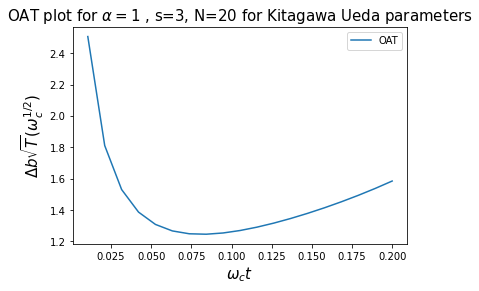

In [ ]:
#Time plot

expr = lambdify(T,delb)

time =0.2;
incr = 0.01;
samples = int(time/incr) ;

x = np.linspace(0 , time , samples)
f1 = plt.plot(x, expr(x),'-')
#plt.yscale("log")


plt.xlabel("$\omega_c t$",fontsize = 15)
plt.ylabel("$\Delta b\sqrt{T} (\omega_c^{1/2})$",fontsize = 15)
#plt.ylabel(r"$\langle J_y^2 \rangle }$",fontsize = 20)
plt.legend(["OAT","OAT with untwisting, $\delta =0$"])
plt.title(r"OAT plot for $\alpha=1$ , s=3, N=20 for Kitagawa Ueda parameters",fontsize = 15)
plt.show(f1)








In [ ]:
#Wigner rotation matrix
def myRotationd(j,m1,m2,beta):
  out = 0
  t1 = sqrt(mt.factorial(j+m1)*mt.factorial(j-m1)*mt.factorial(j+m2)*mt.factorial(j-m2))
  t2 = 0;
  smin = np.maximum(0,m2-m1)
  smax = np.minimum(j-m1,j+m2)
  for s in np.linspace(smin,smax,smax-smin+1,endpoint='True'):
    numer = ((-1)**(m1-m2+s))*(mt.cos(beta/2))**(2*j+m2-m1-2*s)*(mt.sin(beta/2))**(m1-m2+2*s)
    denom = mt.factorial(j+m2-s)*mt.factorial(s)*mt.factorial(m1-m2+s)*mt.factorial(j-m1-s)
    t2 = t2 + numer/denom
  out = t1*t2
  return out



                                                    









In [ ]:
def Rho_0_OAT(num , beta , theta):

  # for beta and theta going to zero, this gives back the CSS state

  R1 = zeros(num + 1,num + 1)
  R2 = zeros(num + 1,num + 1)
  V1 = zeros(num + 1, 1)
  V2 = zeros(num + 1, 1)


  for M1 in np.linspace(-num/2 , num/2 , num+1):

    for M3 in np.linspace(-num/2, num/2 , num+1):

      M1 = int(M1)
      M3 = int(M3)

      R1[M1 + int(num/2), M3 + int(num/2)] = myRotationd(int(num/2), -M1, -M3, beta) * exp(1j * pi/2 * (-M1+M3) - 1j * theta/2 * M3**2 )

      V1[M3 + int(num/2), 0] = myRotationd(int(num/2) , -M3, int(num/2) , pi/2)

      R2[M1 + int(num/2),M3 + int(num/2)] = myRotationd(int(num/2) , -M3 , -M1, -beta) * exp(-1j * pi/2 * (-M1+M3) + 1j * theta/2 * M3**2 )

      V2[M3 + int(num/2), 0] = myRotationd(int(num/2), int(num/2), -M3 , -pi/2)

  rho1 = R1 * V1  
  rho2 = R2 * V2
  

  rho = rho1 * rho2.transpose()

  return rho



In [ ]:
def Rho_0_CSS(num):

  R1 = zeros(num + 1 , 1)
  R2 = zeros(num + 1 , 1)

  for M1 in np.linspace(num/2 , -num/2 , num+1):

    M1 = int(M1)

    R1[ M1 + int(num/2), 0 ]= myRotationd(int(num/2) , -M1 , int(num/2) , pi/2)

    R2[ M1 + int(num/2), 0 ] = myRotationd(int(num/2) , int(num/2) , -M1, -pi/2)

  return R1 * R2.transpose()

In [ ]:
def Time_Evolve(num, rho, phi , psi , chi):

  E = zeros(num + 1, num + 1)

  for M1 in np.linspace(num/2,-num/2,num + 1):

    for M2 in np.linspace(num/2, -num/2, num + 1):

      M1 = int(M1)
      M2 = int(M2)

      E[M1 + int(num/2),M2 + int(num/2)] = exp(-1j * phi * (M1 - M2) -1j * psi * (M1**2 - M2**2) - chi/2 * (M1 - M2)**2) * rho[M1+ int(num/2),M2+int(num/2)]

  return E





In [ ]:
def Partial_Rho(num, rho):

  partial_rho = zeros(num+1 , num + 1)

  for M1 in np.linspace(num/2 , -num/2 , num + 1):

    for M2 in np.linspace(num/2 , -num/2 , num + 1):

      M1 = int(M1)
      M2 = int(M2)

      partial_rho[M1+int(num/2),M2+int(num/2)] = -1j * T* (-M1 + M2) * rho[ M1 + int(num/2) , M2 +int(num/2) ]

  return partial_rho
      




In [ ]:
def Rho_Countertwist(num, rho, alpha, theta):

  rho_twisted = zeros(num+1 , num+1)
 

  for M1 in np.linspace(num/2 , -num/2 , num + 1):

    for M2 in np.linspace(num/2 , -num/2 , num + 1):

      M1 = int(M1)
      M2 = int(M2)
    
      rho_twisted[M1 + int(num/2),M2 + int(num/2)] = exp(-1j * (-M1**2+M2**2)*(alpha - theta)*0.5)*rho[M1 + int(num/2),M2 + int(num/2)]
      

  return rho_twisted


In [ ]:
def Pre_Measurement(num, rho, ang):

  RhoMeas = zeros(num + 1, num + 1)

  for M1 in np.linspace(num/2 , -num/2 , num + 1):

    for M2 in np.linspace(num/2 , -num/2 , num + 1):

        M1 = int(M1)
        M2 = int(M2)

        #RhoMeas[M1, M2] = rho[M1,M2] * Rotation.d(int(num/2),M1,M2,th).doit() * exp( -1j* ph *(M1-M2) )* exp( 1j * pi/2 * (M1-M2)) 
        RhoMeas[M1+int(num/2), M2+int(num/2)] = rho[M1+int(num/2),M2+int(num/2)] * exp( 1j * ang * (M1-M2)) 

  return RhoMeas

In [ ]:
x = symbols('x')
y = symbols('y')
s= x +y**2
l=s.subs(x,2)
t=lambdify(y,l)
optimize.minimize_scalar(t)



     fun: 2.0
    nfev: 41
     nit: 37
 success: True
       x: 3.195989188427313e-11

In [ ]:
a = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/topt.txt",dtype=float)
np.linspace(np.pi/10,9*np.pi/10,17)


17